<a href="https://colab.research.google.com/github/kooshaj/Fifa-Prediction-Analysis/blob/master/SoccerPredictionsML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [44]:
import pandas as pd

In [45]:
matches = pd.read_csv("/content/drive/My Drive/matches.csv")
matches

,Unnamed: 0,Date,home,away,winner,Fifa,Difference,Interval
0,0,17/08/2018,Real Betis,Levante UD,A,fifa_20,14.733333,10 to 15
1,1,17/08/2018,Girona FC,Real Valladolid CF,D,fifa_20,-11.200000,-10 to -15
2,2,18/08/2018,FC Barcelona,Deportivo Alavés,H,fifa_20,50.083333,50 to 55
3,3,18/08/2018,RC Celta,RCD Espanyol,D,fifa_20,-3.250000,-1 to -5
4,4,18/08/2018,Villarreal CF,Real Sociedad,A,fifa_20,5.500000,5 to 10
...,...,...,...,...,...,...,...,...
9051,375,11/05/14,Norwich City,Arsenal,A,fifa_15,-33.250000,-30 to -35
9052,376,11/05/14,Southampton,Manchester United,D,fifa_15,-27.550000,-25 to -30
9053,377,11/05/14,Sunderland,Swansea City,A,fifa_15,-11.300000,-10 to -15
9054,378,11/05/14,Tottenham Hotspur,Aston Villa,H,fifa_15,25.000000,25 to 30


In [46]:
dates = matches["Date"]
fifa = matches["Fifa"]
home_team = matches["home"]
away_team = matches["away"]
matches = matches.drop(columns = ["Unnamed: 0", "Date", "Interval", "Fifa", "home", "away"]) #Dropping columns for simplicity and accurate modelling
#Model is being trained on just Difference to predict winner
matches

,winner,Difference
0,A,14.733333
1,D,-11.200000
2,H,50.083333
3,D,-3.250000
4,A,5.500000
...,...,...
9051,A,-33.250000
9052,D,-27.550000
9053,A,-11.300000
9054,H,25.000000


In [47]:
!pip install pycaret

In [48]:
from pycaret.classification import *
from pycaret import classification

In [49]:

x = classification.setup(data= matches, target = "winner")

Setup Succesfully Completed!


,Description,Value
0,session_id,2704
1,Target Type,Multiclass
2,Label Encoded,"A: 0, D: 1, H: 2"
3,Original Data,"(9056, 2)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [128]:
compare_models()

IntProgress(value=0, description='Processing: ', max=176)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:56:51
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 5 of 10
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier
ETC,. . . . . . . . . . . . . . . . . .,24.6 Seconds Remaining


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Naive Bayes,0.5474,0.0,0.4623,0.4125,0.4678,0.2358,0.2641,0.0051
1,Quadratic Discriminant Analysis,0.5474,0.0,0.4623,0.4125,0.4678,0.2358,0.2641,0.0048
2,Logistic Regression,0.5469,0.0,0.4623,0.4122,0.4677,0.2356,0.2635,0.0905
3,Ridge Classifier,0.5469,0.0,0.4623,0.4122,0.4677,0.2356,0.2635,0.0083
4,Linear Discriminant Analysis,0.5469,0.0,0.4624,0.4122,0.4677,0.2357,0.2636,0.0057
5,Ada Boost Classifier,0.5433,0.0,0.4565,0.4138,0.4633,0.2261,0.2553,0.1861
6,Extreme Gradient Boosting,0.5417,0.0,0.4544,0.4204,0.4619,0.2227,0.2516,0.3835
7,Gradient Boosting Classifier,0.5351,0.0,0.4493,0.4282,0.4593,0.2139,0.2394,1.4248
8,Light Gradient Boosting Machine,0.5291,0.0,0.4524,0.4750,0.4758,0.2152,0.2312,0.2475
9,K Neighbors Classifier,0.4584,0.0,0.4215,0.4504,0.4514,0.1551,0.1563,0.0059


KeyboardInterrupt: ignored

Using Extreme Gradient Boosting Model as it was found to have the highest accuracy on this dataset

In [51]:
help(create_model)

Help on function create_model in module pycaret.classification:

create_model(estimator=None, ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=True, system=True, **kwargs)
    This function creates a model and scores it using Stratified Cross Validation. 
    The output prints a score grid that shows Accuracy, AUC, Recall, Precision, 
    F1, Kappa and MCC by fold (default = 10 Fold). 
    
    This function returns a trained model object. 
    
    setup() function must be called before using create_model()
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> experiment_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    
    This will create a trained Logistic Regression model.
    
    Parameters
    ----------
    estimator : string / object, default = None
        Enter ID of the estimators available in model library or pass an untrained model 
        obje

In [52]:
classification_nb = create_model("nb")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5662,0.0000,0.4776,0.4289,0.4843,0.2641,0.2979
1,0.5568,0.0000,0.4683,0.4197,0.4756,0.2497,0.2803
2,0.5284,0.0000,0.4486,0.3973,0.4525,0.2098,0.2323
3,0.5379,0.0000,0.4537,0.4052,0.4589,0.2184,0.2460
4,0.5410,0.0000,0.4547,0.4092,0.4611,0.2188,0.2494
5,0.5584,0.0000,0.4742,0.4201,0.4782,0.2585,0.2866
6,0.5505,0.0000,0.4679,0.4141,0.4719,0.2475,0.2732
7,0.5694,0.0000,0.4828,0.4303,0.4871,0.2716,0.3052
8,0.5331,0.0000,0.4496,0.4004,0.4552,0.2123,0.2373
9,0.5324,0.0000,0.4453,0.3999,0.4535,0.2069,0.2331


In [53]:
classification_qda = create_model("qda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5662,0.0000,0.4776,0.4289,0.4843,0.2641,0.2979
1,0.5568,0.0000,0.4683,0.4197,0.4756,0.2497,0.2803
2,0.5284,0.0000,0.4486,0.3973,0.4525,0.2098,0.2323
3,0.5379,0.0000,0.4537,0.4052,0.4589,0.2184,0.2460
4,0.5410,0.0000,0.4547,0.4092,0.4611,0.2188,0.2494
5,0.5584,0.0000,0.4742,0.4201,0.4782,0.2585,0.2866
6,0.5505,0.0000,0.4679,0.4141,0.4719,0.2475,0.2732
7,0.5694,0.0000,0.4828,0.4303,0.4871,0.2716,0.3052
8,0.5331,0.0000,0.4496,0.4004,0.4552,0.2123,0.2373
9,0.5324,0.0000,0.4453,0.3999,0.4535,0.2069,0.2331


In [131]:
classification_gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5505,0.0000,0.4606,0.4168,0.4694,0.2348,0.2669
1,0.5410,0.0000,0.4523,0.4360,0.4661,0.2238,0.2492
2,0.5079,0.0000,0.4263,0.3866,0.4360,0.1709,0.1898
3,0.5300,0.0000,0.4498,0.5201,0.4599,0.2091,0.2321
4,0.5284,0.0000,0.4424,0.4023,0.4518,0.1991,0.2249
5,0.5363,0.0000,0.4483,0.4497,0.4627,0.2165,0.2410
6,0.5410,0.0000,0.4572,0.4094,0.4648,0.2302,0.2538
7,0.5584,0.0000,0.4717,0.4236,0.4787,0.2540,0.2838
8,0.5252,0.0000,0.4412,0.4370,0.4513,0.1980,0.2209
9,0.5324,0.0000,0.4428,0.4008,0.4524,0.2031,0.2313


In [132]:
classification.evaluate_model(classification_gbc)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [107]:
tune_model(classification_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5647,0.0000,0.4746,0.4286,0.4822,0.2588,0.2945
1,0.5521,0.0000,0.4630,0.4159,0.4709,0.2403,0.2709
2,0.5300,0.0000,0.4467,0.3978,0.4523,0.2077,0.2323
3,0.5426,0.0000,0.4559,0.4094,0.4621,0.2234,0.2539
4,0.5394,0.0000,0.4523,0.4080,0.4592,0.2151,0.2460
5,0.5599,0.0000,0.4735,0.4209,0.4787,0.2585,0.2883
6,0.5552,0.0000,0.4700,0.4174,0.4749,0.2515,0.2799
7,0.5710,0.0000,0.4821,0.4323,0.4876,0.2714,0.3077
8,0.5363,0.0000,0.4506,0.4027,0.4571,0.2153,0.2421
9,0.5387,0.0000,0.4493,0.4053,0.4580,0.2145,0.2439


GaussianNB(priors=None, var_smoothing=0.1)

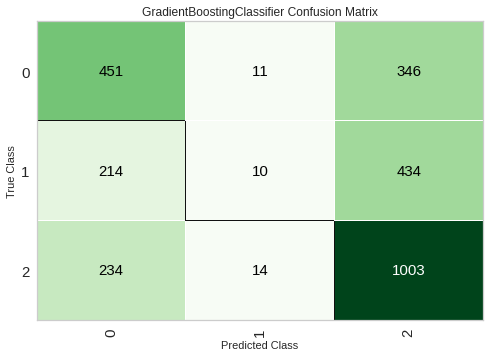

In [133]:

plot_model(create_model("gbc"), plot = 'confusion_matrix')

In [134]:
test = predict_model(classification_gbc)
test["Date"] = dates
test["home"] = home_team
test["away"] = away_team
test["FIFA"] = fifa
cols = ["Date", "home", "away", "FIFA", "Difference", "winner", "Label", "Score"]
test = test[cols]
test.columns = ["Date", "home", "away", "FIFA", "Difference", "Actual Result", "Predicted Result", "Accuracy"]
test


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5388,0,0.4584,0.4774,0.4686,0.2266,0.249


,Date,home,away,FIFA,Difference,Actual Result,Predicted Result,Accuracy
0,17/08/2018,Real Betis,Levante UD,fifa_20,18.633333,H,H,0.6139
1,17/08/2018,Girona FC,Real Valladolid CF,fifa_20,-20.250000,A,A,0.3848
2,18/08/2018,FC Barcelona,Deportivo Alavés,fifa_20,32.100000,H,H,0.7486
3,18/08/2018,RC Celta,RCD Espanyol,fifa_20,-31.350000,A,A,0.5192
4,18/08/2018,Villarreal CF,Real Sociedad,fifa_20,10.150000,D,H,0.4709
...,...,...,...,...,...,...,...,...
2712,08/12/17,VfB Stuttgart,Bayer 04 Leverkusen,NaN,17.400000,D,H,0.5542
2713,09/12/17,Borussia Dortmund,SV Werder Bremen,NaN,-9.250000,D,H,0.3960
2714,09/12/17,Eintracht Frankfurt,FC Bayern München,NaN,-13.516667,H,H,0.3518
2715,09/12/17,Hamburger SV,VfL Wolfsburg,NaN,70.250000,H,H,0.9473


In [135]:
final_model = finalize_model(classification_gbc)

#Predicting 2020-2021 English Premier League

In [219]:
prem2021 = pd.read_csv("/content/drive/My Drive/prem2021.csv")
prem2021

,Unnamed: 0,home,away,fifa,difference,interval
0,0,Arsenal,Aston Villa,fifa_20,33.100000,30 to 35
1,1,Arsenal,Brighton & Hove Albion,fifa_20,27.250000,25 to 30
2,2,Arsenal,Burnley,fifa_20,27.350000,25 to 30
3,3,Arsenal,Chelsea,fifa_20,7.266667,5 to 10
4,4,Arsenal,Crystal Palace,fifa_20,24.850000,20 to 25
...,...,...,...,...,...,...
375,375,Wolverhampton Wanderers,Sheffield United,fifa_20,30.816667,30 to 35
376,376,Wolverhampton Wanderers,Southampton,fifa_20,16.500000,15 to 20
377,377,Wolverhampton Wanderers,Tottenham Hotspur,fifa_20,-25.966667,-25 to -30
378,378,Wolverhampton Wanderers,West Bromwich Albion,fifa_20,33.933333,30 to 35


In [220]:
prem2021.rename(columns = {"difference": "Difference"}, inplace = True)
prem2021 = prem2021.drop(columns = ["Unnamed: 0", "fifa", "interval"])
# accounting for home advantage
prediction["Difference"] = abs(prediction["Difference"]) + prediction["Difference"]
prediction = predict_model(classification_gbc, data = prem2021)
prediction.rename(columns = {"Label": "Predicted Result", "Score": "Accuracy"}, inplace = True)
prediction


,home,away,Difference,Predicted Result,Accuracy
0,Arsenal,Aston Villa,33.100000,H,0.7505
1,Arsenal,Brighton & Hove Albion,27.250000,H,0.6666
2,Arsenal,Burnley,27.350000,H,0.6727
3,Arsenal,Chelsea,7.266667,H,0.4906
4,Arsenal,Crystal Palace,24.850000,D,0.4728
...,...,...,...,...,...
375,Wolverhampton Wanderers,Sheffield United,30.816667,H,0.7036
376,Wolverhampton Wanderers,Southampton,16.500000,H,0.5703
377,Wolverhampton Wanderers,Tottenham Hotspur,-25.966667,A,0.4460
378,Wolverhampton Wanderers,West Bromwich Albion,33.933333,H,0.7505


In [221]:
#Accounting for Draws when model is innacurate
predres = prediction["Predicted Result"]
diff = prediction["Difference"]
accuracy = prediction["Accuracy"]
for i in range(len(accuracy)):
  if accuracy[i] < 0.50:
    if diff[i] > -10 or diff[i] < 10:
      predres[i] = "D"
prediction["Predicted Result"] = predres   


In [222]:
def home_points(result):
  if result == "H":
    return 3
  elif result == "D":
    return 1
  else:
    return 0

In [223]:
def away_points(result):
  if result == "A":
    return 3
  elif result == "D":
    return 1
  else:
    return 0

In [224]:
results = prediction["Predicted Result"]
h_points = []
a_points = []
for i in results:
  h_points.append(home_points(i))
  a_points.append(away_points(i))


In [225]:
results[377]

'D'

In [226]:
prediction["Home Points"] = h_points
prediction["Away Points"] = a_points 
prediction.loc[prediction.home == "Leeds United"]

,home,away,Difference,Predicted Result,Accuracy,Home Points,Away Points
152,Leeds United,Arsenal,-48.200000,A,0.6274,0,3
153,Leeds United,Aston Villa,-15.100000,D,0.3689,1,1
154,Leeds United,Brighton & Hove Albion,-20.950000,D,0.3769,1,1
155,Leeds United,Burnley,-20.850000,D,0.3769,1,1
156,Leeds United,Chelsea,-40.933333,A,0.6117,0,3
157,Leeds United,Crystal Palace,-23.350000,D,0.4460,1,1
158,Leeds United,Everton,-32.300000,A,0.5489,0,3
159,Leeds United,Fulham,-4.933333,D,0.4586,1,1
160,Leeds United,Leicester City,-30.350000,A,0.5172,0,3
161,Leeds United,Liverpool,-60.850000,A,0.8909,0,3


In [227]:
def team_points(team):
  home = sum(prediction.loc[prediction["home"] == team]["Home Points"])
  away = sum(prediction.loc[prediction["away"] == team]["Away Points"])
  return home + away


In [228]:
teams = prediction.home.unique()
points = []
for i in teams:
  points.append(team_points(i))

league_table = pd.DataFrame(list(zip(teams, points)), columns = ["Team", "Points"]).sort_values("Points", ascending = False)
league_table.index = range(1, len(teams) + 1)
league_table


,Team,Points
1,Manchester City,100
2,Liverpool,92
3,Tottenham Hotspur,88
4,Manchester United,80
5,Arsenal,70
6,Chelsea,68
7,West Ham United,60
8,Wolverhampton Wanderers,59
9,Everton,53
10,Leicester City,46
